# Vector Pipeline

## Install Libraries

In [1]:
%pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 972.5 kB/s eta 0:00:00


## Import Google Drive Files

In [1]:
import sys
sys.path.append('/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Closed_Form_Solver/Code Files')
sys.path.append('/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Closed_Form_Solver/Data')

## Import Libraries

In [20]:
#Import sklearn stuff
import datetime
import numpy as np

#Used to load data from pkl file
import dill

#Import External Files
from KFoldCV import KFoldCV_Vectorized
from train_test import TrainTest_Vectorized
from DataGenerationB import *

#plotting
import matplotlib.pyplot as plt

#preprocessing 
from sklearn.preprocessing import StandardScaler

## Import Data

In [21]:
import pickle

file= open("/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Closed_Form_Solver/Data/Bounded_Var_Time:2024-04-15 19:35:40, intercept:5,n_train:5000, n_test:1000, tensor_dimensions:[32 32], tensor_mode_ranks:[4 4], separation_rank:2.pkl", 'rb')
data = pickle.load(file)
file.close()

X_train_Full = data[0]
print(data[0].shape)

Y_train_Full = data[1]
print(data[1].shape)

X_test_Full = data[2]
print(data[2].shape)

Y_test_Full = data[3]
print(data[3].shape)

B_tensored = data[4]
print(data[4].shape)

tensor_dimensions = np.array([32, 32])
tensor_mode_ranks = np.array([4, 4])
separation_rank = 2



(5000, 32, 32)
(5000,)
(1000, 32, 32)
(1000,)
(32, 32)


## Subset Data

In [22]:
n_train_all = [500,650,800,950,1100]
n_test = 400

## Vectorize Data

Number of Samples: 500 ---------------------------------------------------------------------------------------------------------------------------
Sample mean for each feature (across samples): [5.02103284 4.98389931 5.03784751 ... 4.97034156 4.95926459 5.01895535]
Train Intercept: 83.56556395782613
Fold = 0, Alpha = 0, NEE: 0.6700599498472729, NMSE: 0.030111445670531367, Correlation: 0.732647057405218, R^2 Score: 0.5329454188552836, Objective Function Value: 11907.321336530871
Train Intercept: 83.49135842097564
Fold = 0, Alpha = 0.1, NEE: 0.6608543115508055, NMSE: 0.031405441779052336, Correlation: 0.7168578761799657, R^2 Score: 0.5128744193728634, Objective Function Value: 12442.601588258894
Train Intercept: 83.49127483418313
Fold = 0, Alpha = 0.3, NEE: 0.6609268367508078, NMSE: 0.03140565205015866, Correlation: 0.716863729387961, R^2 Score: 0.5128711578860332, Objective Function Value: 12489.822451258466
Train Intercept: 83.49119128527677
Fold = 0, Alpha = 0.5, NEE: 0.66099932104022

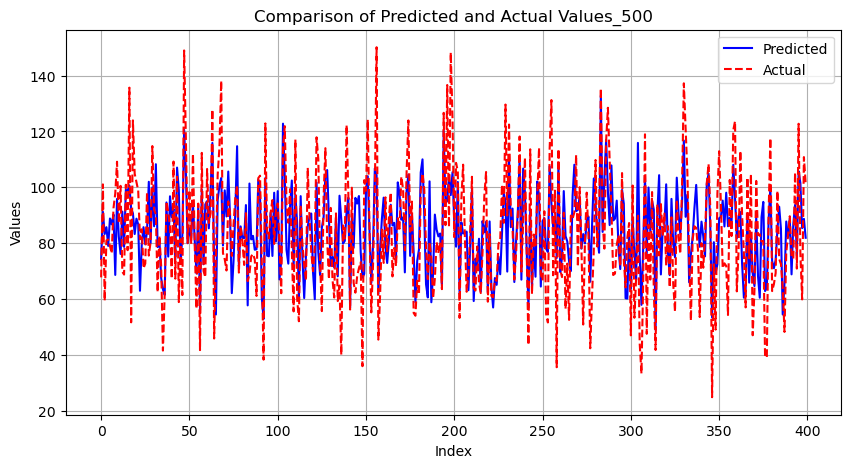

best_lamda: 0.1
Test Normalized Estimation Error: 0.6280786446265477
Test NMSE Loss: 0.03650152704171463
Test Correlation: 0.6589490277505368
Test R2 Score: 0.43069256239319287
Validation NMSE Losses:  [[0.03011145 0.03140544 0.03140565 0.03140587 0.0314061  0.03140634
  0.03140646 0.03140711 0.03140781 0.03140856 0.03140937 0.03141315
  0.03141115 0.0314261  0.03144364 0.03146528 0.03166083 0.03213499]
 [0.03722509 0.03700021 0.0370049  0.03700958 0.03701427 0.03701895
  0.03702129 0.03703299 0.03704467 0.03705635 0.03706801 0.03711457
  0.03709131 0.03723026 0.03734496 0.03745869 0.03812227 0.03916592]
 [0.04219898 0.04415038 0.04416002 0.04416966 0.0441793  0.04418894
  0.04419376 0.04421787 0.04424197 0.04426608 0.04429018 0.04438656
  0.04433837 0.04462717 0.04486698 0.04510566 0.04650267 0.04866274]
 [0.04707571 0.0384576  0.03846576 0.03847392 0.03848208 0.03849025
  0.03849434 0.0385148  0.03853529 0.03855581 0.03857636 0.03865884
  0.03861754 0.03886676 0.03907649 0.03928737 0

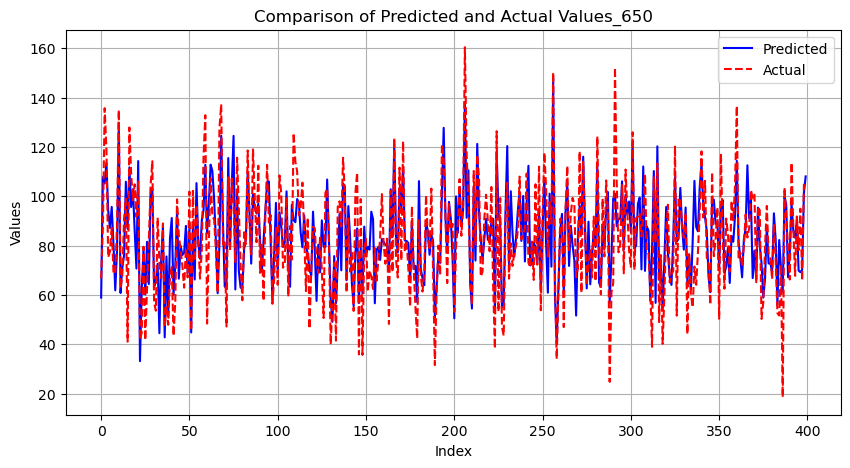

best_lamda: 0.1
Test Normalized Estimation Error: 0.5506175757480812
Test NMSE Loss: 0.02953979047477111
Test Correlation: 0.7539296849406822
Test R2 Score: 0.5669662826603283
Validation NMSE Losses:  [[0.03928406 0.02779429 0.02779966 0.02780505 0.02781045 0.02781586
  0.02781857 0.02783216 0.02784583 0.02785956 0.02787336 0.02792916
  0.02790115 0.0280721  0.02821846 0.02836689 0.02926137 0.03066657]
 [0.05300476 0.02819698 0.02819153 0.02818613 0.02818078 0.02817549
  0.02817286 0.02815992 0.0281473  0.028135   0.028123   0.02807791
  0.02809988 0.02798343 0.0279108  0.02785585 0.02775644 0.02796617]
 [0.03143661 0.03157377 0.03158582 0.03159787 0.03160991 0.03162194
  0.03162796 0.03165803 0.03168808 0.03171809 0.03174808 0.03186772
  0.03180796 0.03216432 0.03245678 0.03274464 0.03436637 0.0366961 ]
 [0.05596069 0.02972945 0.02973842 0.02974739 0.02975637 0.02976537
  0.02976987 0.0297924  0.02981498 0.02983761 0.02986028 0.02995131
  0.02990574 0.03017996 0.03040795 0.03063334 0.

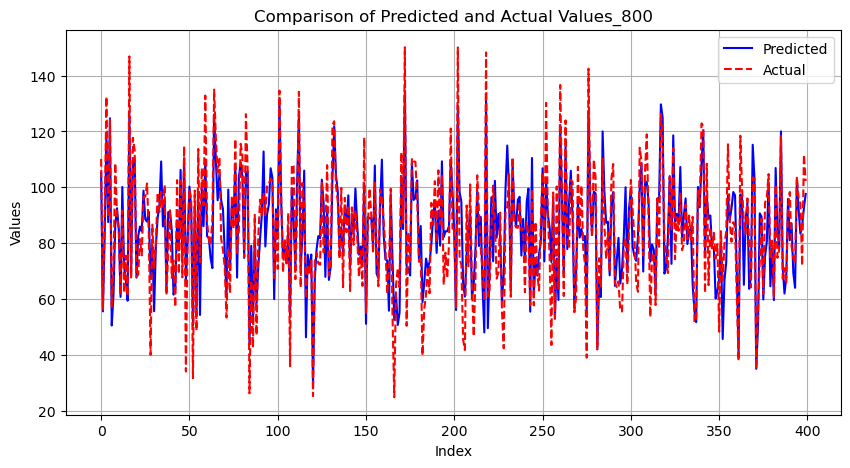

best_lamda: 0.1
Test Normalized Estimation Error: 0.4088633851848286
Test NMSE Loss: 0.016156659438697027
Test Correlation: 0.8650124781656291
Test R2 Score: 0.7474183475431391
Validation NMSE Losses:  [[0.02552447 0.01708396 0.01708924 0.01709464 0.01710013 0.01710574
  0.01710858 0.01712314 0.01713829 0.01715399 0.01717022 0.01723981
  0.01720413 0.01743895 0.01766169 0.01789821 0.01938829 0.02172284]
 [0.02072521 0.02003845 0.02004641 0.02005449 0.02006269 0.020071
  0.0200752  0.0200966  0.02011865 0.02014131 0.02016453 0.02026237
  0.02021253 0.02053206 0.0208224  0.02112167 0.02287003 0.02529992]
 [0.03694295 0.02022462 0.02023019 0.02023579 0.02024141 0.02024704
  0.02024987 0.02026407 0.02027837 0.02029278 0.02030727 0.02036603
  0.02033651 0.02051661 0.02066997 0.02082439 0.02174235 0.02318857]
 [0.02603568 0.02592776 0.02593651 0.02594537 0.02595434 0.02596341
  0.02596799 0.02599123 0.02601506 0.02603944 0.02606432 0.02616832
  0.02611549 0.02645055 0.02675053 0.02705755 0.0

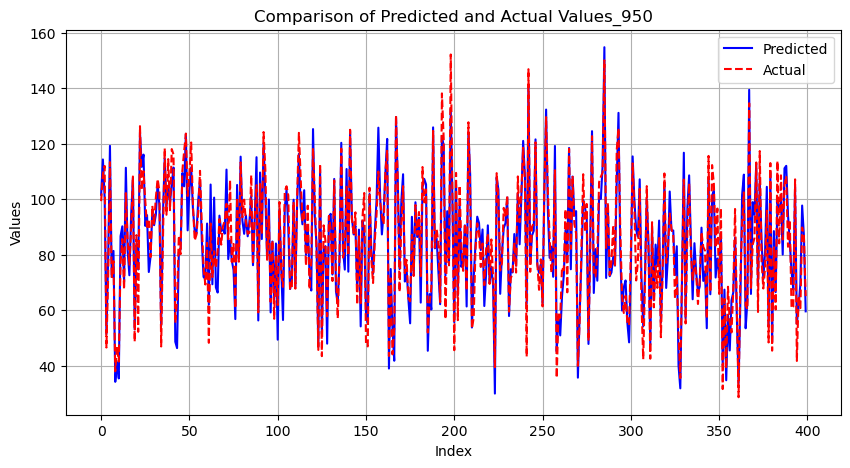

best_lamda: 0.1
Test Normalized Estimation Error: 0.31372001316464704
Test NMSE Loss: 0.006471564924951984
Test Correlation: 0.9485095103879797
Test R2 Score: 0.8987168693226247
Validation NMSE Losses:  [[0.0310426  0.01676863 0.01676562 0.01676323 0.01676143 0.01676019
  0.01675977 0.01675952 0.01676209 0.01676712 0.01677433 0.01682037
  0.0167943  0.01700769 0.0172422  0.01749351 0.01896529 0.02094561]
 [0.01007529 0.01014869 0.01016113 0.01017409 0.01018753 0.0102014
  0.01020849 0.01024523 0.01028381 0.01032382 0.01036491 0.01053544
  0.01044933 0.01096318 0.01136012 0.01172063 0.01336371 0.01521327]
 [0.03935569 0.00987597 0.00988342 0.00989149 0.00990011 0.00990926
  0.00991402 0.00993943 0.00996721 0.00999696 0.01002833 0.0101652
  0.01009488 0.01054213 0.01092589 0.0112995  0.01325297 0.01576138]
 [0.01973112 0.00938348 0.00939594 0.00940886 0.00942219 0.0094359
  0.00944289 0.00947892 0.00951651 0.00955529 0.009595   0.00975949
  0.0096764  0.01018057 0.01059217 0.01098742 0.0

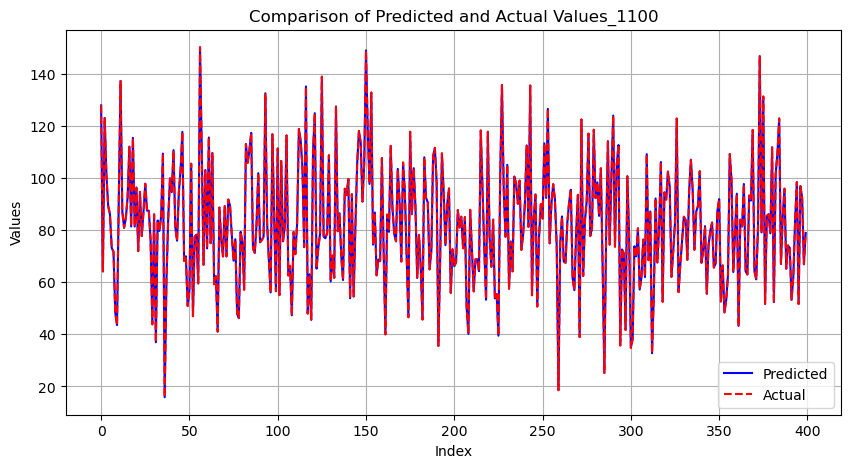

best_lamda: 0.1
Test Normalized Estimation Error: 0.25124596723472037
Test NMSE Loss: 1.1390950270181554e-06
Test Correlation: 0.999992699956464
Test R2 Score: 0.9999841045457215
Validation NMSE Losses:  [[0.00878984 0.00205665 0.00208692 0.00214782 0.00222355 0.00230683
  0.00235003 0.00257127 0.00279058 0.00300233 0.00320528 0.0039368
  0.00358581 0.00539177 0.00654214 0.00751209 0.01157783 0.01584791]
 [0.0663728  0.00324545 0.00331399 0.00338053 0.00344516 0.00350817
  0.00353912 0.00368918 0.00383231 0.00396936 0.00410091 0.00458069
  0.00434933 0.00555251 0.00632414 0.00697405 0.00970189 0.01257133]
 [0.00155677 0.00150537 0.00158966 0.00168979 0.001792   0.00189152
  0.00193968 0.00216237 0.00235671 0.00252769 0.00268004 0.00316527
  0.00294278 0.00397489 0.00456403 0.00506033 0.00729833 0.00986545]
 [0.05361941 0.00348558 0.00351889 0.00357738 0.00364479 0.00371558
  0.00375148 0.00393133 0.00410756 0.00427814 0.00444258 0.00504135
  0.00475322 0.00623156 0.00715958 0.00793724 

In [26]:
for i,n_train in enumerate(n_train_all):
  print('Number of Samples:',n_train,'---------------------------------------------------------------------------------------------------------------------------')
  #Subset X_train and Y_train
  
  # Assuming X_train_Full and Y_train_Full are your full training dataset and labels
  # and n_train is the number of samples you want to select randomly

  # Generate random indices without replacement for training data
  train_indices = np.random.choice(X_train_Full.shape[0], n_train, replace=False)

  # Select the random samples and corresponding labels
  X_train = X_train_Full[train_indices, :, :]
  Y_train = Y_train_Full[train_indices]

  # Assuming X_test_Full and Y_test_Full are your full testing dataset and labels
  # and n_test is the number of samples you want to select randomly

  # Generate random indices without replacement for testing data
  test_indices = np.random.choice(X_test_Full.shape[0], n_test, replace=False)

  # Select the random samples and corresponding labels
  X_test = X_test_Full[test_indices, :, :]
  Y_test = Y_test_Full[test_indices]

  #Vectorize them!
  X_train = X_train.reshape(X_train.shape[0], -1)
  X_test = X_test.reshape(X_test.shape[0], -1)

  # Initialize StandardScaler
  scaler = StandardScaler() #standard scalar only

  # Fit scaler on train data and transform train data
  X_train_scaled = scaler.fit_transform(X_train)
  # Transform test data using the scaler fitted on train data
  X_test_scaled = scaler.transform(X_test)

  #Reassign

  X_train = X_train_scaled
  X_test = X_test_scaled

  print("Sample mean for each feature (across samples):",scaler.mean_)


  alphas = [0,0.1,0.3, 0.5, 0.7, 0.9, 1, 1.5, 2, 2.5, 3, 5, 4,10,15,20,50,100]
  k_folds = 10
  lambda1, validation_normalized_estimation_errors, validation_nmse_losses, validation_correlations, validation_R2_scores, objective_function_values = KFoldCV_Vectorized(X_train, Y_train, B_tensored, alphas, k_folds, intercept= True)

  test_normalized_estimation_error, test_nmse_loss, test_correlation, test_R2_score,Y_test_predicted = TrainTest_Vectorized(X_train, Y_train, X_test, Y_test, B_tensored, lambda1,intercept= True)

  #print predicted
  print(Y_test_predicted)
  print(Y_test)

  # Plotting both arrays
  plt.figure(figsize=(10, 5))  # Set the figure size
  plt.plot(Y_test_predicted, label='Predicted', color='blue')  # Plot Y_test_predicted
  plt.plot(Y_test, label='Actual', color='red', linestyle='--')  # Plot Y_test with dashed line
  plt.title(f"Comparison of Predicted and Actual Values_{n_train}")  # Title of the plot
  plt.xlabel('Index')  # Label for the x-axis
  plt.ylabel('Values')  # Label for the y-axis
  #plt.yscale('log')
  plt.legend()  # Add a legend
  plt.grid(True)  # Add gridlines for better readability
  plt.show()  # Display the plot

  #Get current time and store in variable
  formatted_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
  pkl_file = f"/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Closed_Form_Solver/Experimental Results/Vector_Base_Line/n_train_{n_train},intercept_0,n_test_{n_test}, p1_16, p2_16, d1_4, d2_4, S_2,ExecutionTime_{formatted_time}.pkl"

  print('best_lamda:',lambda1)
  print(f"Test Normalized Estimation Error: {test_normalized_estimation_error}")
  print(f"Test NMSE Loss: {test_nmse_loss}")
  print(f"Test Correlation: {test_correlation}")
  print(f"Test R2 Score: {test_R2_score}")

  print("Validation NMSE Losses: ", validation_nmse_losses)
  print("Validation Correlations: ", validation_correlations)
  print("Validation R2 Scores: ", validation_R2_scores)

  with open(pkl_file, "wb") as file:
    dill.dump((lambda1, validation_normalized_estimation_errors, validation_nmse_losses, validation_correlations, validation_R2_scores, test_normalized_estimation_error, test_nmse_loss, test_correlation, test_R2_score), file)




